In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 12)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 12)

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing, neighbors, grid_search, linear_model, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [2]:
df = pd.read_csv(os.path.join('..', 'dataset', 'winequality-red.csv'))

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


A description of the dataset is as follows:

    fixed acidity in g/dm3
    volatile acidity in g/dm3
    citric acid in g/dm3
    residual sugar in g/dm3
    chlorides in g/dm3
    free sulfur dioxide in g/dm3
    total sulfur dioxide in g/dm3
    density in g/cm3
    pH
    sulphates in g/dm3
    alcohol in % vol.
    quality is the rating score

Quality is the dependent variable. 

Cleaning data - 
Checking for null values in the dataset

In [4]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,False,False,False,False,False,False,False,False,False,False,False,False
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [6]:
df.isnull().sum().sum()

0

Clean data frame (no null and no duplicates)

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [8]:
df.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

Exploratory Data Analysis

In [9]:
df.quality.max()

8

In [10]:
df.quality.min()

3

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df.quality.median()

6.0

In [13]:
df[df.quality == df.quality.max()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1120,7.9,0.54,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8


In [14]:
df[df.quality == df.quality.min()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


Finding correlation

In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


From the table above, alcohol, sulphates,citric acid, and fixed acidity are highly correlated with quality

In [16]:
df.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d8bd610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e4b52d0>]], dtype=object)

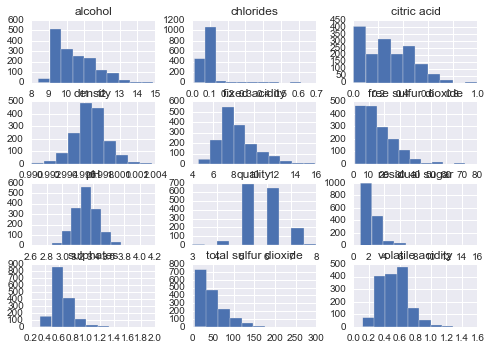

In [42]:
df.hist()

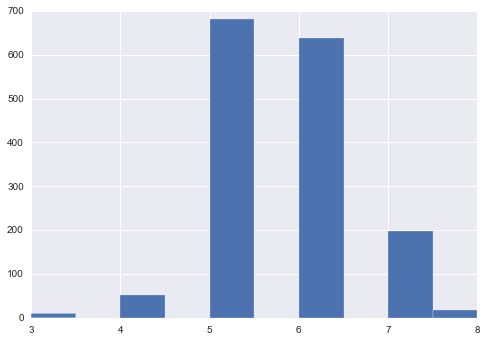

In [43]:
df.quality.hist()

Training/Test split

In [18]:
X = df.drop('quality', axis= 1)

In [19]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [20]:
y = df.quality

In [21]:
y

0       5
1       5
2       5
3       6
4       5
5       5
       ..
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [23]:
print len (X_train)
print len (X_test)
print len (y_train)
print len (y_test)

959
640
959
640


Working with training set total of 815 data points

In [24]:
X_train.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256652,0.672577,0.132647,0.070446,-0.162774,-0.124510,0.649669,-0.672084,0.175937,-0.056035
volatile acidity,-0.256652,1.000000,-0.545274,0.002943,0.064503,-0.012436,0.075221,0.039969,0.241807,-0.248446,-0.210668
citric acid,0.672577,-0.545274,1.000000,0.161045,0.228408,-0.074180,0.020590,0.352202,-0.552012,0.331401,0.112173
residual sugar,0.132647,0.002943,0.161045,1.000000,0.079736,0.250969,0.233797,0.408947,-0.115284,0.009864,-0.004535
chlorides,0.070446,0.064503,0.228408,0.079736,1.000000,0.019048,0.046732,0.187069,-0.266020,0.397159,-0.204521
free sulfur dioxide,-0.162774,-0.012436,-0.074180,0.250969,0.019048,1.000000,0.662044,0.021907,0.069676,0.041214,-0.114230
total sulfur dioxide,-0.124510,0.075221,0.020590,0.233797,0.046732,0.662044,1.000000,0.084709,-0.085698,0.056169,-0.220744
density,0.649669,0.039969,0.352202,0.408947,0.187069,0.021907,0.084709,1.000000,-0.339101,0.150905,-0.495091
pH,-0.672084,0.241807,-0.552012,-0.115284,-0.266020,0.069676,-0.085698,-0.339101,1.000000,-0.230914,0.215999
sulphates,0.175937,-0.248446,0.331401,0.009864,0.397159,0.041214,0.056169,0.150905,-0.230914,1.000000,0.085928


Scatter plot for each of one of varialbe

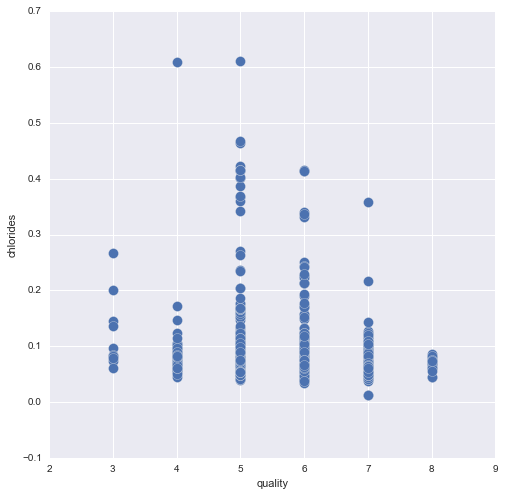

In [25]:
df[ ['quality', 'chlorides'] ].plot(kind = 'scatter', x = 'quality', y = 'chlorides', s = 100, figsize = (8, 8))

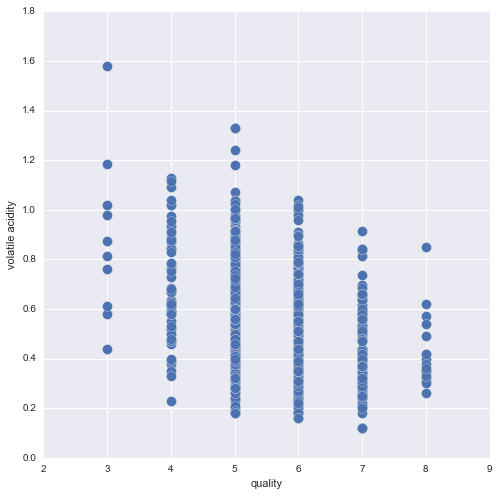

In [26]:
df[ ['quality', 'volatile acidity'] ].plot(kind = 'scatter', x = 'quality', y = 'volatile acidity', s = 100, figsize = (8, 8))

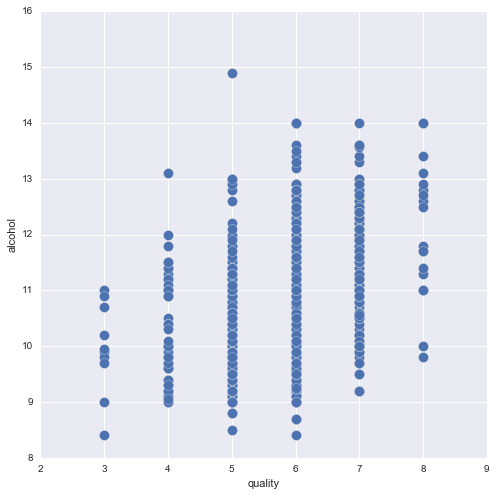

In [27]:
df[ ['quality', 'alcohol'] ].plot(kind = 'scatter', x = 'quality', y = 'alcohol', s = 100, figsize = (8, 8))

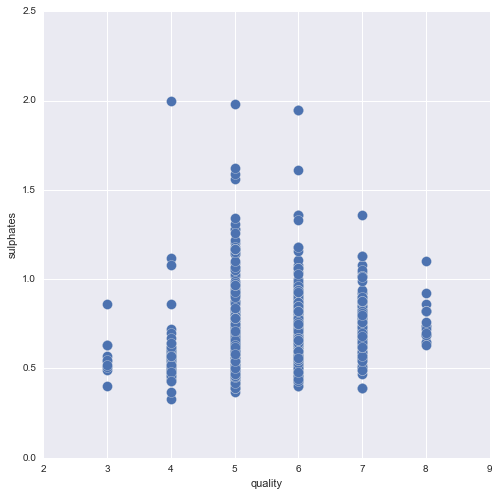

In [28]:
df[ ['quality', 'sulphates'] ].plot(kind = 'scatter', x = 'quality', y = 'sulphates', s = 100, figsize = (8, 8))

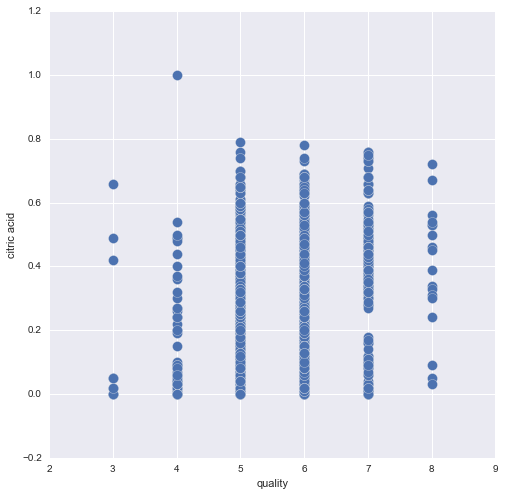

In [29]:
df[ ['quality', 'citric acid'] ].plot(kind = 'scatter', x = 'quality', y = 'citric acid', s = 100, figsize = (8, 8))

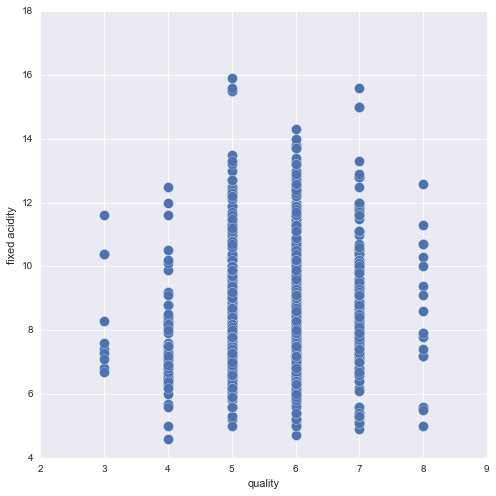

In [30]:
df[ ['quality', 'fixed acidity'] ].plot(kind = 'scatter', x = 'quality', y = 'fixed acidity', s = 100, figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c790290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cbd0a10>]], dtype=object)

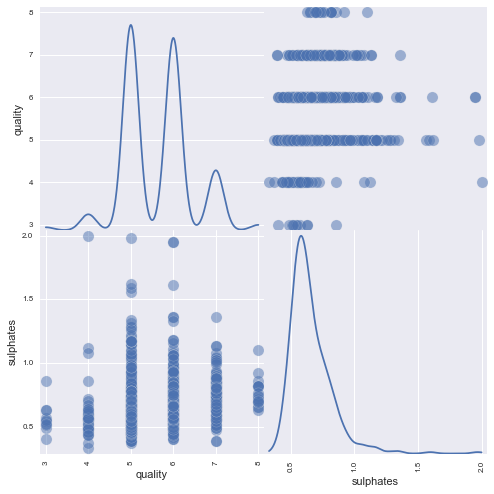

In [31]:
pd.tools.plotting.scatter_matrix(df[ ['quality', 'sulphates'] ], diagonal = 'kde', s = 500, figsize = (8, 8))
#pd.tools.plotting.scatter_matrix(df[ ['quality', 'sulphates'] ], s = 200, figsize = (8, 8))

check for outliers

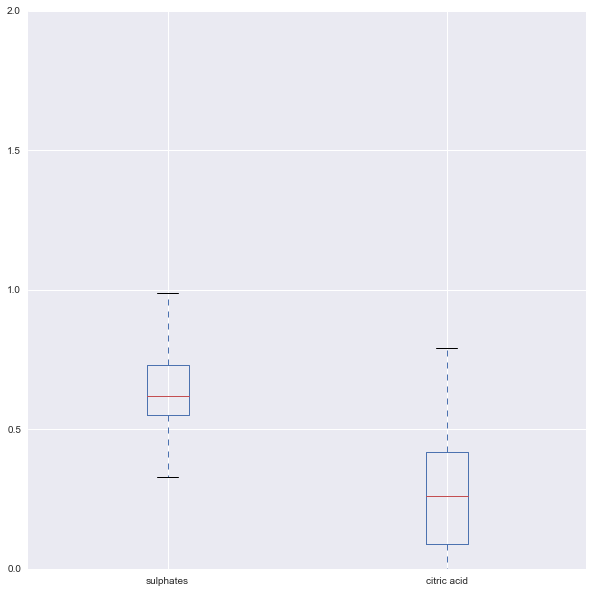

In [32]:
df[ ['sulphates', 'citric acid'] ].plot(kind = 'box', figsize = (10, 10))

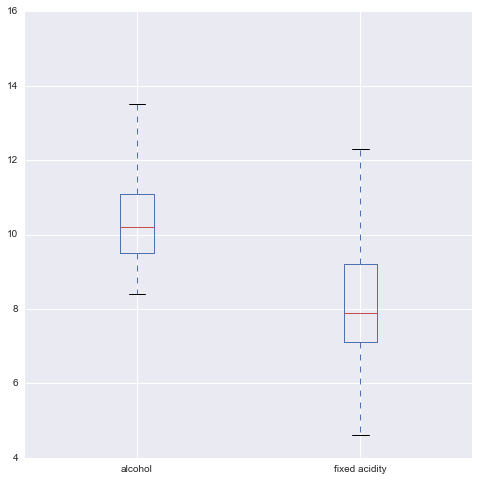

In [33]:
df[ ['alcohol', 'fixed acidity'] ].plot(kind = 'box', figsize = (8, 8))

Logistic Regression
X is already defined as all the variables
Y is quality

In [34]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
117,7.8,0.560,0.12,2.0,0.082,7.0,28.0,0.99700,3.37,0.50,9.4
991,7.1,0.340,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4
252,11.1,0.350,0.48,3.1,0.090,5.0,21.0,0.99860,3.17,0.53,10.5
507,11.2,0.670,0.55,2.3,0.084,6.0,13.0,1.00000,3.17,0.71,9.5
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9
311,7.9,0.530,0.24,2.0,0.072,15.0,105.0,0.99600,3.27,0.54,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1383,8.0,0.600,0.22,2.1,0.080,25.0,105.0,0.99613,3.30,0.49,9.9
763,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6
835,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3


In [35]:
y_train

117     6
991     5
252     5
507     6
1587    6
311     6
       ..
1383    5
763     5
835     5
1216    6
559     6
684     5
Name: quality, dtype: int64

In [36]:
y_train.shape

(959,)